In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la

from src.structured_random_features.src.models.weights import V1_weights

# Package for importing image representation
from PIL import Image, ImageOps

from src.V1_Compress import generate_Y, compress
import pandas as pd
import seaborn as sns
import time
import os.path

## Process V1 data

In [42]:
# Load previously saved data for V1 parameters
V1_params_df = pd.read_csv('result//tree_part1//V1//V1_Reconst_Param_Wed_Jun_22_17_19_23_2022.csv')


for index in V1_params_df.columns:
    if (index == 'Unnamed: 0') :
        V1_params_df.drop('Unnamed: 0', axis = 1, inplace=True)

# Load previously saved data for classical parameters        
load_classical = './result/tree_part1/Classical/Classical_Param_Fri_Jul_8_15_54_10_2022.csv'
classical_param_df = pd.read_csv(load_classical)
for index in classical_param_df.columns:
    if (index == 'Unnamed: 0') :
        classical_param_df.drop('Unnamed: 0', axis = 1, inplace=True)

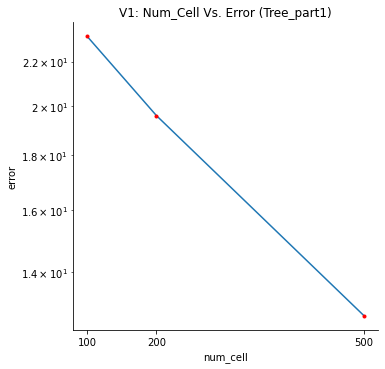

In [45]:
V1_mean_err = V1_params_df.groupby(['num_cell', 'sparse_freq', 'cell_sz', 'alp'],
                                as_index = False).agg({'error':'mean'})
line_data = mean_err.groupby(['num_cell'], as_index = False).agg({'error':'min'})
fig = sns.relplot(x = line_data['num_cell'], y = line_data['error'], kind='line')
plt.title("V1: Num_Cell Vs. Error (Tree_part1)")
plt.xticks(line_data['num_cell'])
fig.set(yscale = 'log')
plt.plot(line_data['num_cell'], line_data['error'], 'r.')
plt.show()

In [59]:
#V1 Data processing
V1_min_mean_err_df = pd.DataFrame()
for i in V1_mean_err['num_cell'].unique():
    V1_temp = V1_mean_err.loc[V1_mean_err['num_cell'] == i]
    #hyperparameter for each number of cell
    ## Grabbing values by each values
    V1_min_mean_err_df = V1_min_mean_err_df.append(V1_temp.loc[V1_temp['error'] == V1_temp['error'].min()])
    
# Merge two data to extract
V1_min_mean_err_df = V1_min_mean_err_df.rename(columns={'error' : 'mean_err'})
V1_merged_df = pd.merge(V1_params_df, V1_min_mean_err_df, on = ['num_cell', 'sparse_freq', 'cell_sz', 'alp'], how = 'left')
V1_plotting_data = V1_merged_df.loc[V1_merged_df['mean_err'].notnull()]


#Classical Data processing
classical_param_mean_df = classical_param_df.groupby(
    ['alpha', 'classical_samp'], as_index=False).mean().drop('repetition', axis=1) 

classical_param_min_df = classical_param_mean_df.groupby('classical_samp', as_index=False).min('error').rename(
    columns={'error' : 'mean_err'})

classical_merged_df = pd.merge(classical_param_df, classical_param_min_df, on=['alpha', 'classical_samp'], how='left')
classical_plotting_data = classical_merged_df.loc[classical_merged_df['mean_err'].notnull()]


In [60]:
V1_plotting_data

,rep,alp,num_cell,cell_sz,sparse_freq,error,mean_err
52,0,0.01,500,7,2,12.439536,12.744960
86,0,1.00,100,5,5,22.854568,23.218323
97,0,1.00,200,7,2,19.494898,19.589010
241,1,0.01,500,7,2,12.717911,12.744960
275,1,1.00,100,5,5,22.836570,23.218323
286,1,1.00,200,7,2,19.421882,19.589010
430,2,0.01,500,7,2,13.093823,12.744960
464,2,1.00,100,5,5,23.164525,23.218323
475,2,1.00,200,7,2,19.684421,19.589010
619,3,0.01,500,7,2,12.623645,12.744960


In [61]:
classical_plotting_data

,classical_samp,alpha,repetition,error,mean_err
0,100,0.001,0,145.336043,145.421509
1,200,0.001,0,145.350533,145.303549
2,500,0.001,0,145.203990,145.209842
21,100,0.001,1,145.403489,145.421509
22,200,0.001,1,145.287369,145.303549
23,500,0.001,1,145.220660,145.209842
42,100,0.001,2,145.466506,145.421509
43,200,0.001,2,145.314357,145.303549
44,500,0.001,2,145.205877,145.209842
63,100,0.001,3,145.454289,145.421509


<Figure size 1080x1080 with 0 Axes>

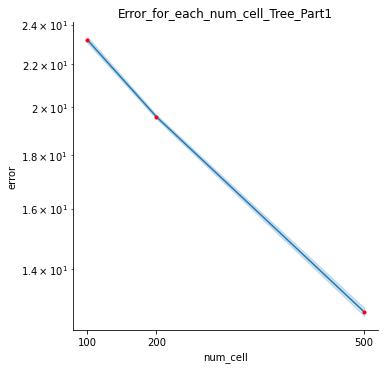

In [73]:
plt.figure(figsize=(15, 15))
save_path = 'result/tree_part1/V1'
V1_fig = sns.relplot(data = V1_plotting_data, x = 'num_cell', y = 'error', kind='line',
                     palette='Accent', legend = False)
# sns.boxplot(data = plotting_data, x = 'num_cell', y = 'error')
title = 'Error_for_each_num_cell_Tree_Part1'
V1_fig.set(title= title.replace('-', ' '))
plt.xticks(line_data['num_cell'])
V1_fig.set(yscale = 'log')
plt.plot(line_data['num_cell'], line_data['error'], 'r.')
fig.savefig(os.path.join(save_path, title + "_".join(
    str.split(time.ctime().replace(":", "_"))) + ".png"), dpi = 200)

plt.show()


## Process Classical Data

In [21]:
load_classical = './result/tree_part1/Classical/Classical_Param_Fri_Jul_8_15_54_10_2022.csv'
classical_param_df = pd.read_csv(load_classical)
for index in classical_param_df.columns:
    if (index == 'Unnamed: 0') :
        classical_param_df.drop('Unnamed: 0', axis = 1, inplace=True)

In [22]:
classical_param_df

,classical_samp,alpha,repetition,error
0,100,0.001,0,145.336043
1,200,0.001,0,145.350533
2,500,0.001,0,145.203990
3,100,0.010,0,145.480875
4,200,0.010,0,145.339246
...,...,...,...,...
205,200,100.000,9,145.781640
206,500,100.000,9,145.781640
207,100,1000.000,9,145.781640
208,200,1000.000,9,145.781640


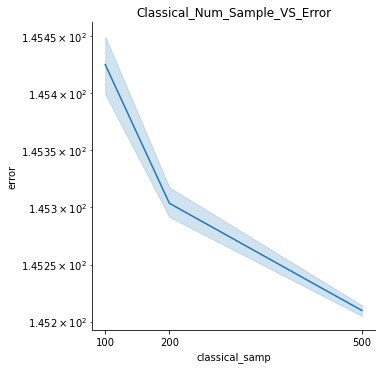

In [75]:
save_path = 'result/tree_part1/Classical/'

classical_param_mean_df = classical_param_df.groupby(
    ['alpha', 'classical_samp'], as_index=False).mean().drop('repetition', axis=1) 

classical_param_min_df = classical_param_mean_df.groupby('classical_samp', as_index=False).min('error').rename(
    columns={'error' : 'mean_err'})

classical_merged_df = pd.merge(classical_param_df, classical_param_min_df, on=['alpha', 'classical_samp'], how='left')
classical_plotting_data = classical_merged_df.loc[classical_merged_df['mean_err'].notnull()]

classical_fig = sns.relplot(data = classical_plotting_data, x = 'classical_samp', y = 'error', kind= 'line')
classical_fig.set(yscale='log')
# plt.plot(x = classical_param_df['classical_samp'].unique(), y = min_classical_param_df_aug['mean_err'])
title = 'Classical_Num_Sample_VS_Error'
plt.title(title)
plt.xticks(classical_param_df['classical_samp'].unique())
plt.show()

classical_fig.savefig(os.path.join(save_path, title + "_".join(
    str.split(time.ctime().replace(":", "_"))) + ".png"), dpi = 200)

## Adding both lines in One Figure

In [41]:
classical_fig.fig
plt.hold(True)

AttributeError: module 'matplotlib.pyplot' has no attribute 'hold'